In [ ]:
pip uninstall kmodes && pip install kmodes

Found existing installation: kmodes 0.11.1
Uninstalling kmodes-0.11.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/kmodes-0.11.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/kmodes/*
Proceed (y/n)? y
  Successfully uninstalled kmodes-0.11.1
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
sns.set()

In [ ]:
Retail_data = pd.read_csv("/content/drive/MyDrive/Project/OnlineRetail.csv",encoding = 'cp1252')

In [ ]:
Retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
Retail_data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
Retail_data.shape

(541909, 8)

In [ ]:
Retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
Retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
Retail_data.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


**Copying Data to a new variable**

In [ ]:
raw_retail_data = Retail_data.copy(deep = True)

**Dropping InvoiceDate Column**



In [ ]:
no_date = raw_retail_data.drop(['InvoiceDate'],axis = 1)

In [ ]:
# raw_retail_data["TotalAmount"] = raw_retail_data['Quantity']*raw_retail_data['UnitPrice']
# raw_retail_data = raw_retail_data.drop(['Quantity','UnitPrice'], axis= 1)
# neg = raw_retail_data.loc[raw_retail_data["TotalAmount"] < 0]

**Checking that if there is any negative value in Column Quantity, Unit Price, Customer ID**


In [ ]:
print( no_date.loc[no_date['UnitPrice'] < 0].count())

InvoiceNo      2
StockCode      2
Description    2
Quantity       2
UnitPrice      2
CustomerID     0
Country        2
dtype: int64


In [ ]:
print(no_date.loc[no_date['CustomerID'] < 0].count())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
print(no_date.loc[no_date['Quantity'] < 0].count())

InvoiceNo      10624
StockCode      10624
Description     9762
Quantity       10624
UnitPrice      10624
CustomerID      8905
Country        10624
dtype: int64


From Above are able to see that there are negative values in Quantity and UnitPrice, so we will covert it to 0

In [ ]:
no_date['Quantity']= list(map((lambda x: 0 if(x<0) else x),no_date['Quantity']))

In [ ]:
no_date['UnitPrice']= list(map((lambda x: 0 if(x<0) else x),no_date['UnitPrice']))

**Dropping Null Values**

In [ ]:
no_date.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
no_date.shape

(406829, 7)

In [ ]:
type(no_date)

pandas.core.frame.DataFrame

In [ ]:
no_date

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France


**Converting dataframe to Numpy as input to KMode (Prototype) is numpy array**

In [ ]:
final_data = no_date.values

**Converting Int to float**

In [ ]:
final_data[:,3] = final_data[:,3].astype(float)
final_data[:,4] = final_data[:,4].astype(float)
final_data[:,5] = final_data[:,5].astype(float)

In [ ]:
kproto = KPrototypes(n_clusters=3,verbose = 2,max_iter = 20)

In [ ]:
clusters = kproto.fit_predict(final_data,categorical = [0,1,2,6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 62487, ncost: 159585945346.3317
Run: 1, iteration: 2/20, moves: 24860, ncost: 153048628850.76862
Run: 1, iteration: 3/20, moves: 9535, ncost: 152090648897.44678
Run: 1, iteration: 4/20, moves: 4177, ncost: 151911452109.11838
Run: 1, iteration: 5/20, moves: 1846, ncost: 151874806340.21185
Run: 1, iteration: 6/20, moves: 707, ncost: 151869925033.87903
Run: 1, iteration: 7/20, moves: 241, ncost: 151869328505.0095
Run: 1, iteration: 8/20, moves: 109, ncost: 151869108704.98865
Run: 1, iteration: 9/20, moves: 11, ncost: 151869106749.47058
Run: 1, iteration: 10/20, moves: 0, ncost: 151869106749.47058
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 74847, ncost: 170983543970.74982
Run: 2, iteration: 2/20, moves: 37258, ncost: 155546795277.19012
Run: 2, iteration: 3/20, moves: 13541, ncost: 153598322177.83218
Run: 2, iter

In [ ]:
print(kproto.cluster_centroids_)

[['11.819375680325853' '3.578145384320138' '15143.857115769515' '567183'
  '85123A' 'WHITE HANGING HEART T-LIGHT HOLDER' 'United Kingdom']
 ['14.32101655108939' '3.8318951394088256' '13269.353714077153' '576339'
  'POST' 'POSTAGE' 'United Kingdom']
 ['12.238013005780347' '3.0011624277475395' '17273.674906069366' '562031'
  '85123A' 'WHITE HANGING HEART T-LIGHT HOLDER' 'United Kingdom']]


In [ ]:
cluster_dict = []
for c in clusters:
  cluster_dict.append(c)

In [ ]:
a = pd.DataFrame(cluster_dict)

In [ ]:
type(a)

pandas.core.frame.DataFrame

In [ ]:
type(clusters)

numpy.ndarray

**As we have built the 3 clusters, now we want to know which customers belong to which cluster. 'model.labels_' can give the cluster number in which the customer belongs**

In [ ]:
data_output = no_date.copy(deep = True)
data_output['Cluster'] = cluster_dict
data_output

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,1


In [ ]:
type(data_output)

pandas.core.frame.DataFrame

In [ ]:
data_output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   UnitPrice    406829 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      406829 non-null  object 
 7   Cluster      406829 non-null  int16  
dtypes: float64(2), int16(1), int64(1), object(4)
memory usage: 41.7+ MB


**Check the size of each Cluster**

In [ ]:
np.unique(clusters, return_counts=True)

(array([0, 1, 2], dtype=uint16), array([142395, 126034, 138400]))

**Plot a count plot to visualize the size of the cluster**

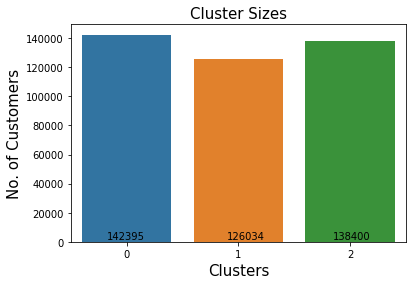

In [ ]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(clusters, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(clusters, return_counts=True)[1][1])
plt.text(x = 1.85, y =2000, s = np.unique(clusters, return_counts=True)[1][2])

plt.show()

** **

In [ ]:
Cluster_0 = data_output.loc[data_output['Cluster']==0]
Cluster_0

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Cluster
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,10.95,15100.0,United Kingdom,0
82,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48,3.45,15291.0,United Kingdom,0
83,536376,21733,RED HANGING HEART T-LIGHT HOLDER,64,2.55,15291.0,United Kingdom,0
86,536378,22386,JUMBO BAG PINK POLKADOT,10,1.95,14688.0,United Kingdom,0
87,536378,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,1.95,14688.0,United Kingdom,0
...,...,...,...,...,...,...,...,...
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,0.85,15804.0,United Kingdom,0
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,0.39,15804.0,United Kingdom,0
541887,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,3.75,15804.0,United Kingdom,0
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,0.95,15804.0,United Kingdom,0


In [ ]:
Cluster_0.loc[Cluster_0['Cluster'] == 0].nunique()

InvoiceNo      7531
StockCode      3488
Description    3658
Quantity        152
UnitPrice       289
CustomerID     1480
Country          13
Cluster           1
dtype: int64

In [ ]:
Cluster_1 = data_output.loc[data_output['Cluster']==1]
Cluster_1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Cluster
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,1
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2.10,13047.0,United Kingdom,1
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2.10,13047.0,United Kingdom,1
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,3.75,13047.0,United Kingdom,1
13,536367,22310,IVORY KNITTED MUG COSY,6,1.65,13047.0,United Kingdom,1
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,1


In [ ]:
Cluster_1.loc[Cluster_1['Cluster'] == 1].nunique()

InvoiceNo      7295
StockCode      3353
Description    3511
Quantity        176
UnitPrice       339
CustomerID     1379
Country          32
Cluster           1
dtype: int64

In [ ]:
Cluster_2 = data_output.loc[data_output['Cluster']==2]
Cluster_2

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2
...,...,...,...,...,...,...,...,...
541860,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,2.89,17581.0,United Kingdom,2
541861,581581,23561,SET OF 6 RIBBONS PARTY,6,2.89,17581.0,United Kingdom,2
541862,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,1.65,17581.0,United Kingdom,2
541863,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,2.08,17581.0,United Kingdom,2


In [ ]:
Cluster_2.loc[Cluster_2['Cluster'] == 2].nunique()

InvoiceNo      7364
StockCode      3422
Description    3568
Quantity        232
UnitPrice       353
CustomerID     1513
Country           9
Cluster           1
dtype: int64